In [53]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from scipy import stats
from sklearn.preprocessing import StandardScaler

import datetime as dt
from scipy import stats

In [13]:
os.chdir("C:\\Jerry\\Insights_mgr")

In [14]:
df_1 = pd.read_excel("Interview Activity_Datasets (1).xlsx", sheet_name=2)
df_2 = pd.read_excel("Interview Activity_Datasets (1).xlsx", sheet_name=3)

In [15]:
df_1

,Year,Playoffs Start Date,AMA (000),Reach (000),% Reached (Canadian population),Avg. Weekly Reach (000),# of Canadian teams at start of Playoffs,Loyalty %
0,2015,2015-04-15,1299.9,25401,72.5,16533,5,28.9
1,2016,2016-04-13,631.7,19958,56.7,11594,0,21.8
2,2017,2017-04-12,1400.5,24885,69.9,16003,5,28.5
3,2018,2018-04-11,1173.8,22812,63.6,14525,2,26.9
4,2019,2019-04-10,1010.9,22658,62.3,13679,3,25.4
5,2020,2020-08-11,683.0,18590,50.5,11907,3,22.4
6,2021,2021-05-15,955.5,21187,56.6,12557,4,28.1
7,2022,2022-05-02,1056.0,20288,54.2,13678,3,27.0
8,2023,2023-04-17,1204.3,21905,57.6,12946,3,28.5


In [16]:
df_2

,Year/Month,UV (000),Number of Streams (000),Total Mins Streamed (000)
0,2022-10-01,328,4025,169527
1,2022-11-01,358,4959,245746
2,2022-12-01,328,5624,224251
3,2023-01-01,332,5707,203637
4,2023-02-01,308,5301,171504
5,2023-03-01,362,6113,260221
6,2023-04-01,601,11182,526050
7,2023-05-01,499,4742,278051


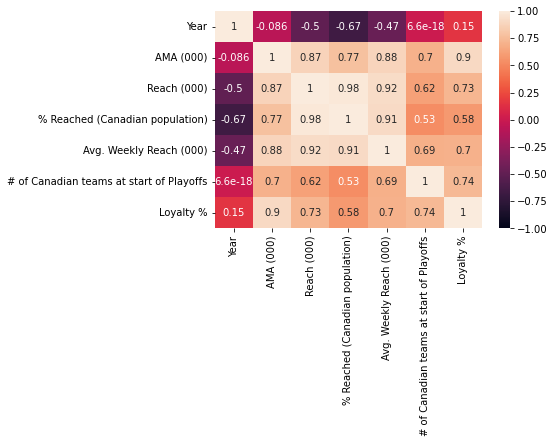

In [10]:
# correlation
cor_heatmap = sns.heatmap(df_1.corr(),
                          vmin=-1, 
                          vmax=1, 
                          annot=True)

In [18]:
# trend pattern df_1
df_1.columns

Index(['Year', 'Playoffs Start Date', 'AMA (000)', 'Reach (000)',
       '% Reached (Canadian population)', 'Avg. Weekly Reach (000)',
       '# of Canadian teams at start of Playoffs', 'Loyalty %'],
      dtype='object')

In [21]:
std_cols = ['AMA (000)', 
             'Reach (000)',
             '% Reached (Canadian population)', 
             'Avg. Weekly Reach (000)',
             '# of Canadian teams at start of Playoffs', 
             'Loyalty %']

In [27]:
std_scaler = StandardScaler()
std_data = std_scaler.fit_transform(df_1[std_cols])
df_1_std = pd.DataFrame(
                        columns=std_cols,
                        data=std_data
                    )

df_1_std['Year'] = df_1['Year']

In [40]:
with pd.ExcelWriter("Interview Activity_Datasets (1).xlsx") as writer:
    df_1_std.to_excel(excel_writer=writer, sheet_name='std_df_1')

In [41]:
df_1_std

,AMA (000),Reach (000),% Reached (Canadian population),Avg. Weekly Reach (000),# of Canadian teams at start of Playoffs,Loyalty %,Year
0,1.031563,1.622403,1.760271,1.743536,1.303840,1.000196,2015
1,-1.685150,-0.947578,-0.544614,-1.310727,-2.147502,-1.827792,2016
2,1.440574,1.378767,1.380986,1.415786,1.303840,0.840873,2017
3,0.518876,0.399974,0.461949,0.501795,-0.766965,0.203580,2018
4,-0.143429,0.327261,0.272307,-0.021369,-0.076696,-0.393882,2019
5,-1.476578,-1.593497,-1.449063,-1.117169,-0.076696,-1.588807,2020
6,-0.368670,-0.367290,-0.559202,-0.715211,0.613572,0.681549,2021
7,0.039934,-0.791764,-0.909311,-0.021987,-0.076696,0.243410,2022
8,0.642880,-0.028277,-0.413323,-0.474654,-0.076696,0.840873,2023


In [38]:
fig = go.Figure()
# Create and style traces
colors=['rgb(31, 119, 180)', 
        'rgb(255, 127, 14)',
        'rgb(44, 160, 44)', 
        'rgb(214, 39, 40)',
        'rgb(148, 103, 189)', 
        'rgb(140, 86, 75)']

for col, color in zip(std_cols, colors):
    fig.add_trace(go.Scatter(x=df_1_std['Year'], 
                             y=df_1_std[col], 
                             name=col,
                             line=dict(color=color, width=1)
                            )
                 )
                        
fig.show()

In [50]:
# Euclidean Distance

# The Euclidean distance is a widely used technique to measure the similarity between time series.
# It is a simple and intuitive measure that calculates the distance 
# between two time series as the straight-line distance between their corresponding points.
# We can easily calculate it with the euclidean_distances function from scikit-learn.

from sklearn.metrics.pairwise import euclidean_distances

euc_dist = euclidean_distances(df_1_std[std_cols].T)
euc_df = pd.DataFrame(
    euc_dist,
    index=std_cols,
    columns=std_cols
)

In [52]:
euc_df

,AMA (000),Reach (000),% Reached (Canadian population),Avg. Weekly Reach (000),# of Canadian teams at start of Playoffs,Loyalty %
AMA (000),0.000000,1.512765,2.016223,1.471355,2.328154,1.318814
Reach (000),1.512765,0.000000,0.638766,1.191460,2.616922,2.221928
% Reached (Canadian population),2.016223,0.638766,0.000000,1.265642,2.912201,2.736295
Avg. Weekly Reach (000),1.471355,1.191460,1.265642,0.000000,2.351272,2.313560
# of Canadian teams at start of Playoffs,2.328154,2.616922,2.912201,2.351272,0.000000,2.164906
Loyalty %,1.318814,2.221928,2.736295,2.313560,2.164906,0.000000


Slope : -0.03322368871498683
Intercept : 0.1328947548599467


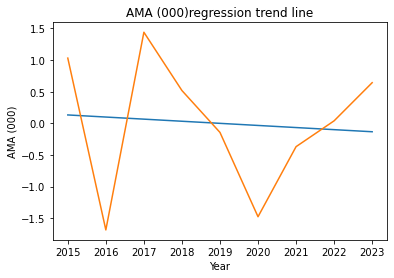

Slope : -0.19368113260865427
Intercept : 0.7747245304346163


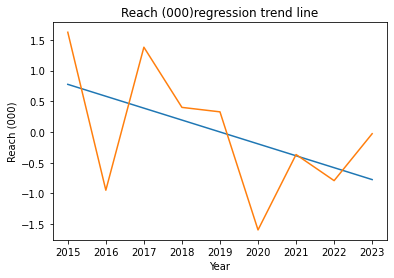

Slope : -0.2596642405654481
Intercept : 1.0386569622617934


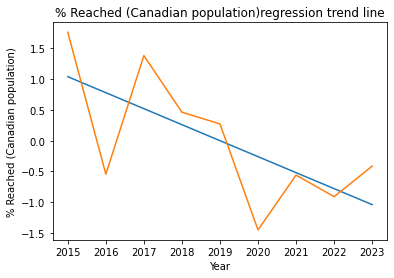

Slope : -0.18145831893305814
Intercept : 0.7258332757322329


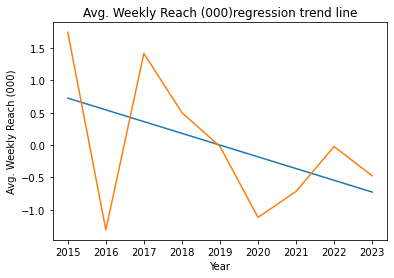

Slope : 7.743693960425013e-17
Intercept : -4.388093244240841e-16


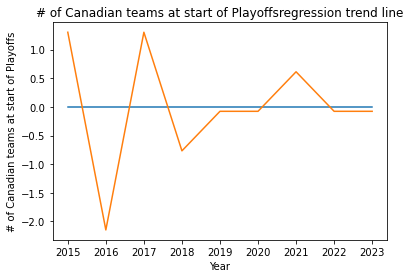

Slope : 0.057754671533878726
Intercept : -0.23101868613551532


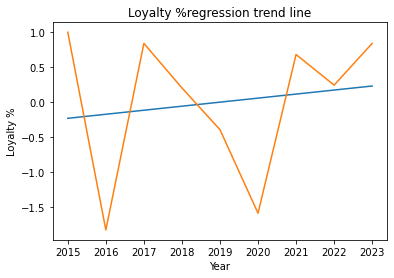

In [59]:
# time series trend analysis for df_1

x = np.arange(df_1['Year'].size)
for col in std_cols:
    fit = np.polyfit(x, df_1_std[col], deg=1)
    print ("Slope : " + str(fit[0]))
    print ("Intercept : " + str(fit[1]))
    
    fit_function = np.poly1d(fit)
    
    #Linear regression plot
    plt.plot(df_1['Year'], fit_function(x))
    
    #Time series data plot
    plt.plot(df_1['Year'], df_1_std[col])
    
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.title(col + 'regression trend line')
    plt.show()

In [60]:
# trend pattern df_2
df_2.columns

Index(['Year/Month', 'UV (000)', 'Number of Streams (000)',
       'Total Mins Streamed (000)'],
      dtype='object')

In [61]:
std_cols = [ 'UV (000)', 
            'Number of Streams (000)',
            'Total Mins Streamed (000)']

In [63]:
std_scaler = StandardScaler()
std_data = std_scaler.fit_transform(df_2[std_cols])
df_2_std = pd.DataFrame(
                        columns=std_cols,
                        data=std_data
                    )

df_2_std['Year/Month'] = df_2['Year/Month']

Slope : 0.30416131589114376
Intercept : -1.0645646056190032


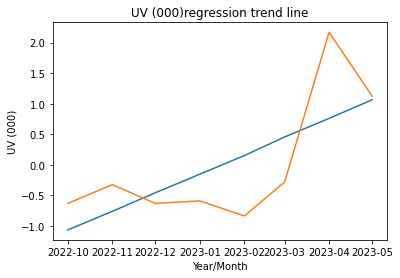

Slope : 0.21436783324763428
Intercept : -0.7502874163667204


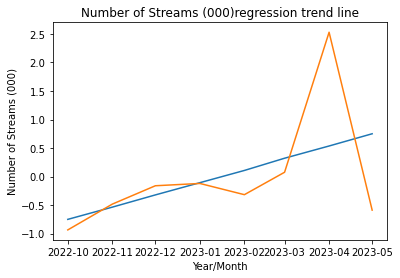

Slope : 0.248624112132947
Intercept : -0.8701843924653146


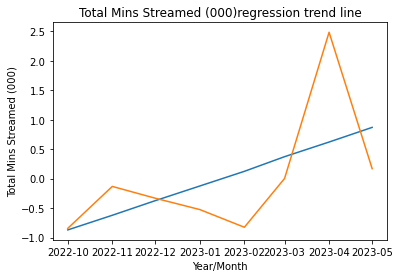

In [64]:
# time series trend analysis for df_2

x = np.arange(df_2['Year/Month'].size)
for col in std_cols:
    fit = np.polyfit(x, df_2_std[col], deg=1)
    print ("Slope : " + str(fit[0]))
    print ("Intercept : " + str(fit[1]))
    
    fit_function = np.poly1d(fit)
    
    #Linear regression plot
    plt.plot(df_2['Year/Month'], fit_function(x))
    
    #Time series data plot
    plt.plot(df_2['Year/Month'], df_2_std[col])
    
    plt.xlabel('Year/Month')
    plt.ylabel(col)
    plt.title(col + 'regression trend line')
    plt.show()

In [71]:
# bottom to spike jump %
(df_2[std_cols].max() - df_2[std_cols].min()) / df_2[std_cols].min()

UV (000)                     0.951299
Number of Streams (000)      1.778137
Total Mins Streamed (000)    2.103046
dtype: float64